In [1]:
#Import required libraries:
try:
    import sys,os
    import tensorflow as tf
    import numpy as np
    import pandas as pd
    import warnings
    import matplotlib.pyplot as plt
    print("----Libraries Loaded----")
except:
    print("----Libraries Not Loaded----")

----Libraries Loaded----


In [2]:
#Loading, Reading, and Pre-Processing Dataset

os.chdir(r'C:\PRANSHU\PROJECTS\Hand-Sign-Language-Classification')
os.listdir()  #path where file is present
warnings.filterwarnings("ignore")   #remove warnings
print("----Folder Loaded----")

----Folder Loaded----


In [3]:
#Loading the Dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
training_path= 'C:/PRANSHU/PROJECTS/Hand-Sign-Language-Classification/DATASET/train'
validation_path= 'C:/PRANSHU/PROJECTS/Hand-Sign-Language-Classification/DATASET/validation'
train_datagen =ImageDataGenerator(
        rescale=1.0 / 255.0, 
        rotation_range=0,  
        zoom_range = 0.15,  
        width_shift_range=0.10,  
        height_shift_range=0.10,  
        horizontal_flip=False,  
        vertical_flip=False) 
val_datagen = ImageDataGenerator(rescale=1.0 / 255.0, 
        rotation_range=0,  
        zoom_range = 0.15,  
        width_shift_range=0.10,  
        height_shift_range=0.10,  
        horizontal_flip=False,  
        vertical_flip=False)
training_set = train_datagen.flow_from_directory(training_path,target_size=(64,64),batch_size=10,class_mode='categorical')
validation_set = val_datagen.flow_from_directory(validation_path,target_size=(64,64),batch_size=10,class_mode='categorical')
print("Dataset Loaded")

Found 14400 images belonging to 15 classes.
Found 3600 images belonging to 15 classes.
Dataset Loaded


In [4]:
#Building a model:
from Model import classifier_model
model = classifier_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 60, 60, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 128)       1

In [5]:
#Training the model
with tf.device('/GPU:0'):
    history = model.fit(
        training_set,
        steps_per_epoch=14400//10,
        epochs=100,
        verbose=1,
        validation_data = validation_set,
        validation_steps=3600//10
        #callbacks=[earlystopping]
    )

Epoch 1/100
1440/1440 [==============================] - 674s 467ms/step - loss: 1.2646 - accuracy: 0.5842 - val_loss: 0.9927 - val_accuracy: 0.6353
Epoch 2/100
1440/1440 [==============================] - 595s 413ms/step - loss: 0.3378 - accuracy: 0.8937 - val_loss: 0.0391 - val_accuracy: 0.9917
Epoch 3/100
1440/1440 [==============================] - 588s 408ms/step - loss: 0.1544 - accuracy: 0.9539 - val_loss: 0.0667 - val_accuracy: 0.9789
Epoch 4/100
1440/1440 [==============================] - 584s 406ms/step - loss: 0.1308 - accuracy: 0.9594 - val_loss: 0.0283 - val_accuracy: 0.9908
Epoch 5/100
1440/1440 [==============================] - 585s 406ms/step - loss: 0.0959 - accuracy: 0.9688 - val_loss: 0.0717 - val_accuracy: 0.9767
Epoch 6/100
1440/1440 [==============================] - 589s 409ms/step - loss: 0.0845 - accuracy: 0.9751 - val_loss: 0.0388 - val_accuracy: 0.9861
Epoch 7/100
1440/1440 [==============================] - 567s 394ms/step - loss: 0.0549 - accuracy: 0.9838

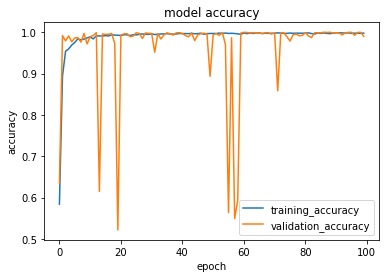

<Figure size 432x288 with 0 Axes>

In [6]:
#Accuracy
plt.plot(history.history['accuracy'][0:220])
plt.plot(history.history['val_accuracy'][0:220])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training_accuracy', 'validation_accuracy'])
plt.show()
plt.savefig('Accuracy.jpg')

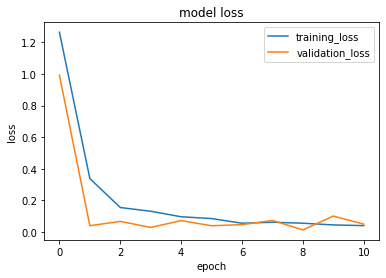

<Figure size 432x288 with 0 Axes>

In [7]:
#Loss

plt.plot(history.history['loss'][0:11])
plt.plot(history.history['val_loss'][0:11])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'validation_loss'])
plt.show()
plt.savefig('Loss.jpg')

In [15]:
#Loading the Saved Model
from tensorflow.keras.models import load_model
from keras.models import model_from_json
from tensorflow.keras.preprocessing.image import load_img, img_to_array

load_model = model_from_json(open('C:/PRANSHU/PROJECTS/Hand-Sign-Language-Classification/HandSignModel1.json','r').read())  
load_model.load_weights('C:/PRANSHU/PROJECTS/Hand-Sign-Language-Classification/HandSignModel1_Weights.h5')
print("------Saved Model Loaded------")

------Saved Model Loaded------


In [16]:
#Testing
def process_image(path):
    img = load_img(path, target_size = (64,64))
    img_tensor = img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis = 0)
    img_tensor/=255.0
    return img_tensor

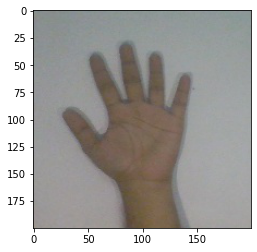

In [17]:
#Testing
path1 = 'C:/PRANSHU/PROJECTS/Hand-Sign-Language-Classification/TESTING_DATA/Bye200.jpg'
img_original1 = load_img(path1)
imgplot = plt.imshow(img_original1)
plt.show()

In [18]:
pred1 = load_model.predict(process_image(path1))

print(pred1)

a=np.argmax(pred1,axis=1)
print(a)

[[1.0000000e+00 4.3338566e-14 1.9667326e-13 2.9054561e-13 1.3246023e-12
  8.8837398e-16 2.0620028e-13 2.4212641e-13 5.2626586e-16 9.0208213e-15
  6.7056708e-16 2.1493671e-14 2.6299560e-14 2.0927433e-15 4.9458809e-14]]
[0]


In [19]:
classes= {1: 'Bye', 2: 'CallMe', 3: 'God', 4: 'GoodLuck', 5: 'Hello', 6: 'I', 7:'ILoveYou', 8: 'No', 9: 'Ok', 10: 'Peace', 11: 'Smile', 12: 'ThumbsDown', 13: 'ThumbsUp', 14: 'Water', 15: 'Yes'}
#print(classes)
print("\n*****************************")
print("Prediction: ",classes[np.argmax(pred1)+1])
print("*****************************")
#max_index=pred1.index(max_value)
#print(l[max_index])


*****************************
Prediction:  Bye
*****************************


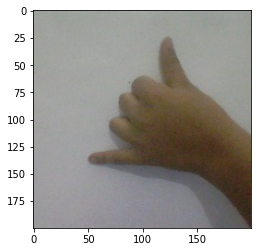

In [20]:
#Testing
path1 = 'C:/PRANSHU/PROJECTS/Hand-Sign-Language-Classification/TESTING_DATA/CallMe200.jpg'
img_original1 = load_img(path1)
imgplot = plt.imshow(img_original1)
plt.show()

In [21]:
pred1 = load_model.predict(process_image(path1))

print(pred1)

a=np.argmax(pred1,axis=1)
print(a)

[[8.4523747e-18 1.0000000e+00 4.6669924e-17 1.1993146e-17 1.7045884e-18
  2.2167515e-16 6.1585590e-18 3.5947800e-17 6.0200087e-17 6.8730464e-17
  3.8795788e-18 1.3620941e-18 3.5214836e-19 3.8470410e-17 2.0729176e-17]]
[1]


In [22]:
classes= {1: 'Bye', 2: 'CallMe', 3: 'God', 4: 'GoodLuck', 5: 'Hello', 6: 'I', 7:'ILoveYou', 8: 'No', 9: 'Ok', 10: 'Peace', 11: 'Smile', 12: 'ThumbsDown', 13: 'ThumbsUp', 14: 'Water', 15: 'Yes'}
#print(classes)
print("\n*****************************")
print("Prediction: ",classes[np.argmax(pred1)+1])
print("*****************************")
#max_index=pred1.index(max_value)
#print(l[max_index])


*****************************
Prediction:  CallMe
*****************************


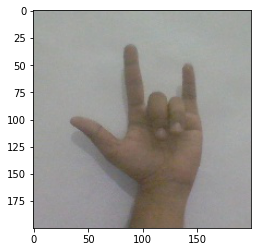

In [23]:
#Testing
path1 = 'C:/PRANSHU/PROJECTS/Hand-Sign-Language-Classification/TESTING_DATA/ILoveYou200.jpg'
img_original1 = load_img(path1)
imgplot = plt.imshow(img_original1)
plt.show()

In [24]:
pred1 = load_model.predict(process_image(path1))

print(pred1)

a=np.argmax(pred1,axis=1)
print(a)

[[2.0056586e-06 6.4956629e-10 6.9375842e-06 2.2123977e-08 2.0458748e-09
  7.6547352e-11 9.9999070e-01 8.1687395e-09 2.6157781e-11 1.6298310e-07
  2.0336666e-09 3.6511056e-09 3.1813863e-10 8.0519683e-08 1.8472048e-09]]
[6]


In [25]:
classes= {1: 'Bye', 2: 'CallMe', 3: 'God', 4: 'GoodLuck', 5: 'Hello', 6: 'I', 7:'ILoveYou', 8: 'No', 9: 'Ok', 10: 'Peace', 11: 'Smile', 12: 'ThumbsDown', 13: 'ThumbsUp', 14: 'Water', 15: 'Yes'}
#print(classes)
print("\n*****************************")
print("Prediction: ",classes[np.argmax(pred1)+1])
print("*****************************")
#max_index=pred1.index(max_value)
#print(l[max_index])


*****************************
Prediction:  ILoveYou
*****************************
